# 5310

# Setup


In [2]:
import csv
import numpy as np
import pandas as pd

# Data loading

In [3]:
df = pd.read_csv("Argentina Salary Survey.csv")
df.head()

,estoy_trabajando_en,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,salir_o_seguir_contestando_sobre_estudios,tengo_edad,me_identifico_genero,sueldo_dolarizado,seniority,_sal
0,Argentina,Buenos Aires,Full-Time,Contractor,2000000.0,2000000.0,Cobro todo el salario en dólares,497,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,40,Hombre Cis,True,Senior,2000000.0
1,Argentina,Río Negro,Full-Time,Contractor,2133000.0,1919000.0,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,NaN,32,Hombre Cis,True,Senior,2133000.0
2,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),485000.0,404000.0,Cobro parte del salario en dólares,NaN,Menos de un sueldo,Mix de las anteriores,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,25,Hombre Cis,True,Semi-Senior,485000.0
3,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),942000.0,577000.0,Cobro parte del salario en dólares,230,3+ sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,34,Hombre Cis,True,Senior,942000.0
4,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),660000.0,380000.0,Mi sueldo está dolarizado (pero cobro en moned...,231,De uno a tres sueldos,Mix de las anteriores,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,45,Hombre Cis,True,Senior,660000.0


In [4]:
df.dtypes

estoy_trabajando_en                                                                      object
donde_estas_trabajando                                                                   object
dedicacion                                                                               object
tipo_de_contrato                                                                         object
ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local                                float64
ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local                                 float64
pagos_en_dolares                                                                         object
si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron              object
recibis_algun_tipo_de_bono                                                               object
a_que_esta_atado_el_bono                                                                 object
tuviste_actualizaciones_de_tus_ingresos_

# Data Cleaning And EDA

In [5]:
column_mapping = {
    'estoy_trabajando_en': 'currently_working_in',
    'donde_estas_trabajando': 'where_are_you_working',
    'dedicacion': 'dedication',
    'tipo_de_contrato': 'contract_type',
    'ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local': 'last_monthly_salary_or_gross_retirement_in_local_currency',
    'ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local': 'last_monthly_salary_or_net_retirement_in_local_currency',
    'pagos_en_dolares': 'payments_in_dollars',
    'si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron': 'if_your_salary_is_dollarized_what_was_the_last_value_of_the_dollar_they_took',
    'recibis_algun_tipo_de_bono': 'do_you_receive_any_bonus',
    'a_que_esta_atado_el_bono': 'what_is_the_bonus_tied_to',
    'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2023': 'did_you_have_salary_updates_during_2023',
    'de_que_fue_el_ajuste_total_acumulado': 'what_was_the_total_accumulated_adjustment',
    'en_que_mes_fue_el_ultimo_ajuste': 'in_which_month_was_the_last_adjustment',
    'como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior': 'how_do_you_consider_your_labour_income_compared_to_the_previous_semester',
    'contas_con_beneficios_adicionales': 'do_you_have_additional_benefits',
    'que_tan_conforme_estas_con_tus_ingresos_laborales': 'how_satisfied_are_you_with_your_labour_income',
    'estas_buscando_trabajo': 'are_you_looking_for_work',
    'trabajo_de': 'work_of',
    'anos_de_experiencia': 'years_of_experience',
    'antiguedad_en_la_empresa_actual': 'length_of_service_in_the_current_company',
    'tiempo_en_el_puesto_actual': 'time_in_the_current_position',
    'cuantas_personas_a_cargo_tenes': 'how_many_people_do_you_have_under_your_charge',
    'plataformas_que_utilizas_en_tu_puesto_actual': 'platforms_you_use_in_your_current_position',
    'lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual': 'programming_languages_or_technologies_you_use_in_your_current_position',
    'frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual': 'frameworks_tools_and_libraries_you_use_in_your_current_position',
    'bases_de_datos': 'databases',
    'qa_testing': 'qa_testing',
    'cantidad_de_personas_en_tu_organizacion': 'number_of_people_in_your_organization',
    'modalidad_de_trabajo': 'work_mode',
    'si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina': 'if_you_work_under_a_hybrid_scheme_how_many_days_a_week_do_you_go_to_the_office',
    'la_recomendas_como_un_buen_lugar_para_trabajar': 'do_you_recommend_it_as_a_good_place_to_work',
    'que_tanto_estas_usando_copilotchatgpt_u_otras_herramientas_de_ia_para_tu_trabajo': 'how_much_are_you_using_copilotchatgpt_or_other_ai_tools_for_your_work',
    'salir_o_seguir_contestando': 'leave_or_continue_answering',
    'maximo_nivel_de_estudios': 'maximum_level_of_studies',
    'estado': 'state',
    'carrera': 'career',
    'institucion_educativa': 'educational_institution',
    'salir_o_seguir_contestando_sobre_las_guardias': 'leave_or_continue_answering_about_the_guard',
    'tenes_guardias': 'do_you_have_guards',
    'cuanto_cobras_por_guardia': 'how_much_do_you_charge_per_guard',
    'aclara_el_numero_que_ingresaste_en_el_campo_anterior': 'clarify_the_number_you_entered_in_the_previous_field',
    'salir_o_seguir_contestando_sobre_estudios': 'leave_or_continue_answering_about_studies',
    'tengo_edad': 'i_have_age',
    'me_identifico_genero': 'i_identify_my_gender',
    'sueldo_dolarizado': 'salary_dollarized',
    'seniority': 'seniority'
}

In [6]:
df.rename(columns=column_mapping, inplace=True)

In [7]:
df.head()

,currently_working_in,where_are_you_working,dedication,contract_type,last_monthly_salary_or_gross_retirement_in_local_currency,last_monthly_salary_or_net_retirement_in_local_currency,payments_in_dollars,if_your_salary_is_dollarized_what_was_the_last_value_of_the_dollar_they_took,do_you_receive_any_bonus,what_is_the_bonus_tied_to,...,leave_or_continue_answering_about_the_guard,do_you_have_guards,how_much_do_you_charge_per_guard,clarify_the_number_you_entered_in_the_previous_field,leave_or_continue_answering_about_studies,i_have_age,i_identify_my_gender,salary_dollarized,seniority,_sal
0,Argentina,Buenos Aires,Full-Time,Contractor,2000000.0,2000000.0,Cobro todo el salario en dólares,497,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,40,Hombre Cis,True,Senior,2000000.0
1,Argentina,Río Negro,Full-Time,Contractor,2133000.0,1919000.0,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,NaN,32,Hombre Cis,True,Senior,2133000.0
2,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),485000.0,404000.0,Cobro parte del salario en dólares,NaN,Menos de un sueldo,Mix de las anteriores,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,25,Hombre Cis,True,Semi-Senior,485000.0
3,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),942000.0,577000.0,Cobro parte del salario en dólares,230,3+ sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,34,Hombre Cis,True,Senior,942000.0
4,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),660000.0,380000.0,Mi sueldo está dolarizado (pero cobro en moned...,231,De uno a tres sueldos,Mix de las anteriores,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,45,Hombre Cis,True,Senior,660000.0


In [8]:
column_mapping_short = {
    'currently_working_in': 'work_country',
    'where_are_you_working': 'work_location',
    'dedication': 'dedication',
    'contract_type': 'contract_type',
    'last_monthly_salary_or_gross_retirement_in_local_currency': 'last_monthly_salary_or_gross',
    'last_monthly_salary_or_net_retirement_in_local_currency': 'last_monthly_salary_or_net',
    'payments_in_dollars': 'payments_in_dollars',
    'if_your_salary_is_dollarized_what_was_the_last_value_of_the_dollar_they_took': 'last_dollar_value',
    'do_you_receive_any_bonus': 'is_receive_bonus',
    'what_is_the_bonus_tied_to': 'bonus_tied_to',
    'did_you_have_salary_updates_during_2023': 'salary_updates_2023',
    'what_was_the_total_accumulated_adjustment': 'total_accumulated_adjustment',
    'in_which_month_was_the_last_adjustment': 'last_adjustment_month',
    'how_do_you_consider_your_labour_income_compared_to_the_previous_semester': 'income_comparison',
    'do_you_have_additional_benefits': 'additional_benefits',
    'how_satisfied_are_you_with_your_labour_income': 'income_satisfaction',
    'are_you_looking_for_work': 'is_looking_for_work',
    'work_of': 'job_type',
    'years_of_experience': 'experience_years',
    'length_of_service_in_the_current_company': 'current_company_service_years',
    'time_in_the_current_position': 'current_position_time',
    'how_many_people_do_you_have_under_your_charge': 'people_under_charge',
    'platforms_you_use_in_your_current_position': 'used_platforms',
    'programming_languages_or_technologies_you_use_in_your_current_position': 'used_technologies',
    'frameworks_tools_and_libraries_you_use_in_your_current_position': 'used_frameworks',
    'databases': 'databases',
    'qa_testing': 'qa_testing',
    'number_of_people_in_your_organization': 'organization_size',
    'work_mode': 'work_mode',
    'if_you_work_under_a_hybrid_scheme_how_many_days_a_week_do_you_go_to_the_office': 'hybrid_scheme_days',
    'do_you_recommend_it_as_a_good_place_to_work': 'recommendation',
    'how_much_are_you_using_copilotchatgpt_or_other_ai_tools_for_your_work': 'ai_tools_usage',
    'leave_or_continue_answering': 'continue_answering',
    'maximum_level_of_studies': 'max_studies_level',
    'state': 'state',
    'career': 'career',
    'educational_institution': 'edu_institution',
    'leave_or_continue_answering_about_the_guard': 'continue_answering_about_guard',
    'do_you_have_guards': 'have_guards',
    'how_much_do_you_charge_per_guard': 'guard_charge',
    'clarify_the_number_you_entered_in_the_previous_field': 'clarify_previous_field_number',
    'leave_or_continue_answering_about_studies': 'continue_answering_about_studies',
    'i_have_age': 'age',
    'i_identify_my_gender': 'gender',
    'salary_dollarized': 'salary_dollarized',
    'seniority': 'seniority',
    '_sal': 'salary'
}


In [9]:
df.rename(columns=column_mapping_short, inplace=True)

In [10]:
df.head()

,work_country,work_location,dedication,contract_type,last_monthly_salary_or_gross,last_monthly_salary_or_net,payments_in_dollars,last_dollar_value,is_receive_bonus,bonus_tied_to,...,continue_answering_about_guard,have_guards,guard_charge,clarify_previous_field_number,continue_answering_about_studies,age,gender,salary_dollarized,seniority,salary
0,Argentina,Buenos Aires,Full-Time,Contractor,2000000.0,2000000.0,Cobro todo el salario en dólares,497,Menos de un sueldo,Performance individual,...,NaN,NaN,NaN,NaN,NaN,40,Hombre Cis,True,Senior,2000000.0
1,Argentina,Río Negro,Full-Time,Contractor,2133000.0,1919000.0,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,NaN,32,Hombre Cis,True,Senior,2133000.0
2,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),485000.0,404000.0,Cobro parte del salario en dólares,NaN,Menos de un sueldo,Mix de las anteriores,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,25,Hombre Cis,True,Semi-Senior,485000.0
3,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),942000.0,577000.0,Cobro parte del salario en dólares,230,3+ sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,NaN,34,Hombre Cis,True,Senior,942000.0
4,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),660000.0,380000.0,Mi sueldo está dolarizado (pero cobro en moned...,231,De uno a tres sueldos,Mix de las anteriores,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,45,Hombre Cis,True,Senior,660000.0


In [118]:
missing_values_count = df.isnull().sum()

print(missing_values_count)

total_rows = len(df)
print(total_rows)
print(df.shape[1])

work_country                           0
work_location                          0
dedication                             0
contract_type                          0
last_monthly_salary_or_gross           0
last_monthly_salary_or_net           210
payments_in_dollars                 3639
last_dollar_value                   4305
is_receive_bonus                       0
bonus_tied_to                          0
salary_updates_2023                    0
total_accumulated_adjustment           0
last_adjustment_month                  0
income_comparison                      0
additional_benefits                    0
income_satisfaction                    0
is_looking_for_work                    0
job_type                               0
experience_years                       0
current_company_service_years          0
current_position_time                  0
people_under_charge                    0
used_platforms                         2
used_technologies                      2
used_frameworks 

In [119]:
df['salary_comparison'] = df['last_monthly_salary_or_gross'] == df['salary']
false_count = df[df['salary_comparison'] == False].shape[0]

print("Salary comparison is False in", false_count, "rows.")

Salary comparison is False in 0 rows.


In [120]:
df.drop(columns=['salary_comparison'], inplace=True)

In [121]:
drop_columns = ['work_country', 'last_monthly_salary_or_gross', 'payments_in_dollars', 'last_dollar_value', 
                'continue_answering', 'continue_answering_about_guard', 'have_guards', 'guard_charge', 
                'clarify_previous_field_number', 'continue_answering_about_studies', 'last_adjustment_month', 
               'recommendation', 'is_looking_for_work', 'current_company_service_years', 'current_position_time', 
                'salary_updates_2023', 'work_mode', 'additional_benefits', 'total_accumulated_adjustment', 
               'last_adjustment_month', 'income_comparison', 'income_satisfaction', 'ai_tools_usage',
               'organization_size', 'hybrid_scheme_days', 'career', 'is_receive_bonus', 'bonus_tied_to']
cleaned_df = df.drop(columns=drop_columns)

In [122]:
columns_to_fill = ['used_platforms', 'used_technologies', 'used_frameworks', 'databases', 'qa_testing']

for column in columns_to_fill:
    mode_value = cleaned_df[column].mode()[0]
    cleaned_df[column].fillna(mode_value, inplace=True)

In [123]:
from sklearn.linear_model import LinearRegression
subset_df = cleaned_df.dropna(subset=['salary', 'last_monthly_salary_or_net'])
X = subset_df[['salary']]
y = subset_df['last_monthly_salary_or_net']
model = LinearRegression()
model.fit(X, y)
missing_values_df = cleaned_df[cleaned_df['last_monthly_salary_or_net'].isnull()]
X_missing = missing_values_df[['salary']]
predicted_values = model.predict(X_missing)
cleaned_df.loc[missing_values_df.index, 'last_monthly_salary_or_net'] = predicted_values

In [124]:
cleaned_df = cleaned_df.dropna()

cleaned_df.isnull().sum()

work_location                 0
dedication                    0
contract_type                 0
last_monthly_salary_or_net    0
job_type                      0
experience_years              0
people_under_charge           0
used_platforms                0
used_technologies             0
used_frameworks               0
databases                     0
qa_testing                    0
max_studies_level             0
state                         0
edu_institution               0
age                           0
gender                        0
salary_dollarized             0
seniority                     0
salary                        0
dtype: int64

In [125]:
print(cleaned_df.shape[1])
total_rows = len(cleaned_df)
print(total_rows)

20
1927


In [129]:
grouped_salary = df.groupby('salary_dollarized')

for group_name, group_data in grouped_salary:
    print(f"Statistics for salary (dollarized: {group_name}):")
    print(group_data['salary'].describe())
    print("\n")

Statistics for salary (dollarized: False):
count    3.639000e+03
mean     5.306316e+05
std      3.294629e+05
min      4.500000e+04
25%      2.977952e+05
50%      4.500000e+05
75%      6.900000e+05
max      2.100000e+06
Name: salary, dtype: float64


Statistics for salary (dollarized: True):
count    1.783000e+03
mean     1.028098e+06
std      8.580439e+05
min      4.830000e+04
25%      4.320000e+05
50%      7.245000e+05
75%      1.350000e+06
max      4.500000e+06
Name: salary, dtype: float64




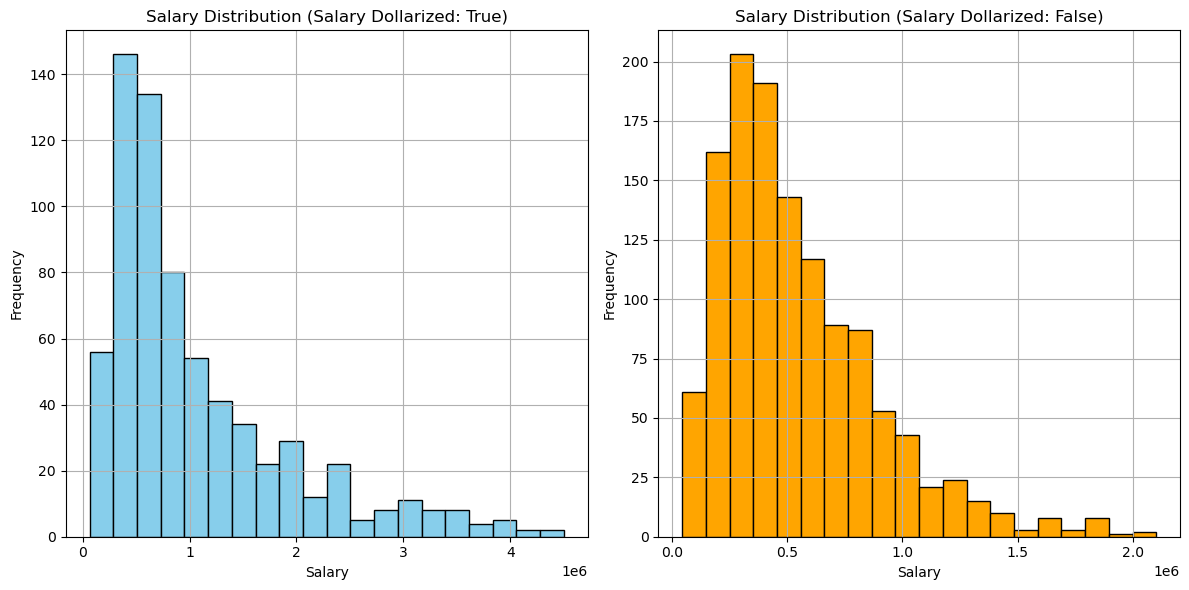

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(cleaned_df[cleaned_df['salary_dollarized'] == True]['salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Salary Distribution (Salary Dollarized: True)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.hist(cleaned_df[cleaned_df['salary_dollarized'] == False]['salary'], bins=20, color='orange', edgecolor='black')
plt.title('Salary Distribution (Salary Dollarized: False)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

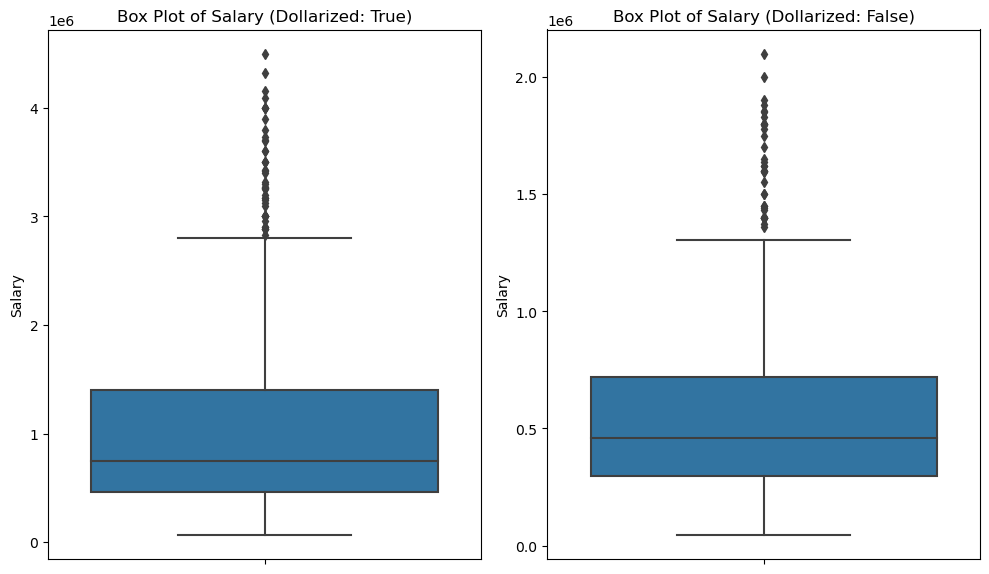

In [130]:
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='salary', data=cleaned_df[cleaned_df['salary_dollarized'] == True])
plt.title('Box Plot of Salary (Dollarized: True)')
plt.ylabel('Salary')
plt.subplot(1, 2, 2)
sns.boxplot(y='salary', data=cleaned_df[cleaned_df['salary_dollarized'] == False])
plt.title('Box Plot of Salary (Dollarized: False)')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


In [131]:
Q1_true = cleaned_df[cleaned_df['salary_dollarized'] == True]['salary'].quantile(0.25)
Q3_true = cleaned_df[cleaned_df['salary_dollarized'] == True]['salary'].quantile(0.75)
IQR_true = Q3_true - Q1_true
lower_bound_true = Q1_true - 1.5 * IQR_true
upper_bound_true = Q3_true + 1.5 * IQR_true
cleaned_df = cleaned_df[~((cleaned_df['salary_dollarized'] == True) & ((cleaned_df['salary'] < lower_bound_true) | (cleaned_df['salary'] > upper_bound_true)))]

Q1_false = cleaned_df[cleaned_df['salary_dollarized'] == False]['salary'].quantile(0.25)
Q3_false = cleaned_df[cleaned_df['salary_dollarized'] == False]['salary'].quantile(0.75)
IQR_false = Q3_false - Q1_false
lower_bound_false = Q1_false - 1.5 * IQR_false
upper_bound_false = Q3_false + 1.5 * IQR_false
cleaned_df = cleaned_df[~((cleaned_df['salary_dollarized'] == False) & ((cleaned_df['salary'] < lower_bound_false) | (cleaned_df['salary'] > upper_bound_false)))]

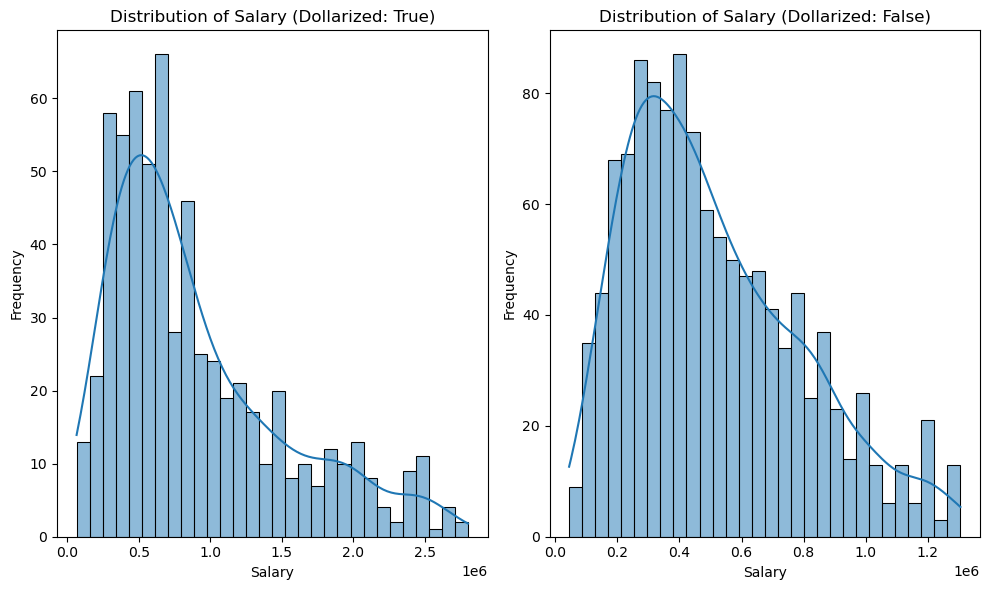

In [132]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(cleaned_df[cleaned_df['salary_dollarized'] == True]['salary'], kde=True, bins=30)
plt.title('Distribution of Salary (Dollarized: True)')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(cleaned_df[cleaned_df['salary_dollarized'] == False]['salary'], kde=True, bins=30)
plt.title('Distribution of Salary (Dollarized: False)')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()


In [110]:
print(cleaned_df.shape[1])
total_rows = len(cleaned_df)
print(total_rows)

20
1657


In [ ]:
cleaned_df.to_csv("new_en.csv", index=False)

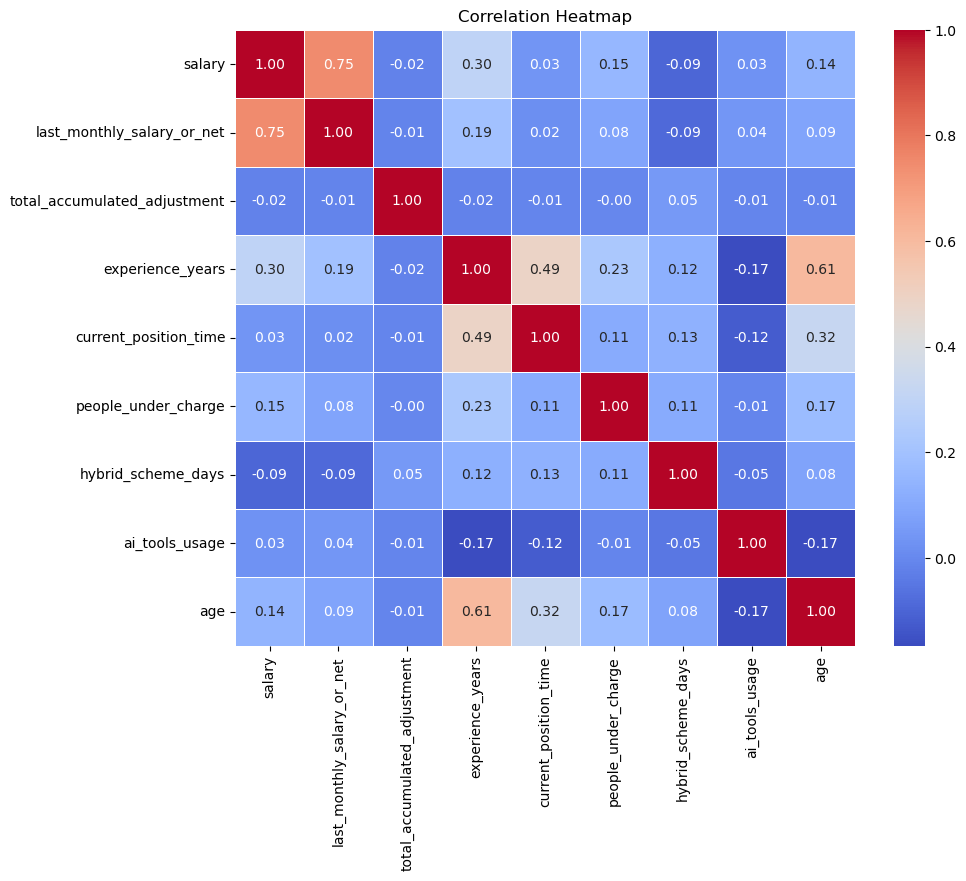

In [112]:

selected_columns = ['salary', 'last_monthly_salary_or_net', 'total_accumulated_adjustment', 'experience_years', 'current_position_time', 
                    'people_under_charge', 'hybrid_scheme_days', 'ai_tools_usage', 'age']
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
